In [1]:
# Importing libraries and pacages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
## Loading the data set
data = pd.read_csv("Position_Salaries.csv")
data.head(6)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000


## EDA(Exploratory Data Analysis)

In [3]:
data.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
## checking the null value
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [6]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


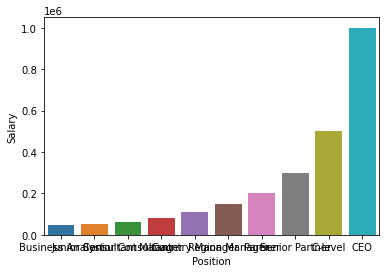

In [7]:
sns.barplot(x='Position',y='Salary',data=data)
plt.show()

<AxesSubplot:xlabel='Level', ylabel='Salary'>

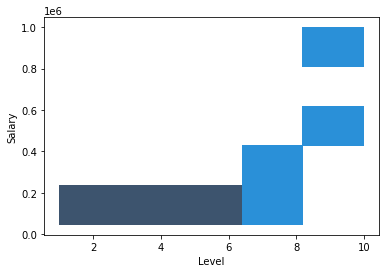

In [8]:
sns.histplot(x='Level',y='Salary',data=data)

<AxesSubplot:xlabel='Position', ylabel='Level'>

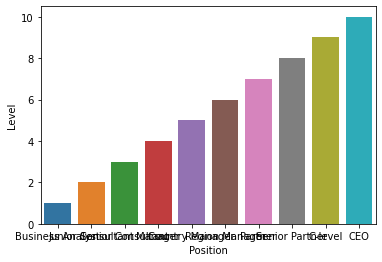

In [9]:
sns.barplot(x='Position',y='Level',data=data)

<AxesSubplot:>

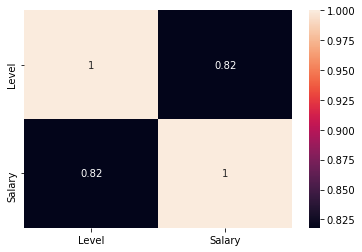

In [10]:
sns.heatmap(data.corr(),annot = True)

* Variable Salary and Level are highly correlated to each other

## Model building

### Linear Regression Model

In [11]:
X = data['Level']
y = data['Salary']

In [12]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [13]:
model = LinearRegression()
model_train = model.fit(X,y)
print('Model Training Completed')

Model Training Completed


In [14]:
print(model_train.coef_)       ###  this is m value
print(model_train.intercept_)  ###  this is y value
                               ###  y = mx + b

[[80878.78787879]]
[-195333.33333333]


In [15]:
X1 = 6.5
m = round((model_train.coef_[0][0])*X1 + (model_train.intercept_[0]))
print("The Salary of {} is {}".format(X1,y))                    

The Salary of 6.5 is [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [16]:
pred = model_train.predict(X)
pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [17]:
data['Pred Salary'] = pred
data

,Position,Level,Salary,Pred Salary
0,Business Analyst,1,45000,-114454.545455
1,Junior Consultant,2,50000,-33575.757576
2,Senior Consultant,3,60000,47303.030303
3,Manager,4,80000,128181.818182
4,Country Manager,5,110000,209060.606061
5,Region Manager,6,150000,289939.393939
6,Partner,7,200000,370818.181818
7,Senior Partner,8,300000,451696.969697
8,C-level,9,500000,532575.757576
9,CEO,10,1000000,613454.545455


In [18]:
data['Variation'] = data['Salary'] - data['Pred Salary']
data

,Position,Level,Salary,Pred Salary,Variation
0,Business Analyst,1,45000,-114454.545455,159454.545455
1,Junior Consultant,2,50000,-33575.757576,83575.757576
2,Senior Consultant,3,60000,47303.030303,12696.969697
3,Manager,4,80000,128181.818182,-48181.818182
4,Country Manager,5,110000,209060.606061,-99060.606061
5,Region Manager,6,150000,289939.393939,-139939.393939
6,Partner,7,200000,370818.181818,-170818.181818
7,Senior Partner,8,300000,451696.969697,-151696.969697
8,C-level,9,500000,532575.757576,-32575.757576
9,CEO,10,1000000,613454.545455,386545.454545


In [19]:
round(r2_score(data['Salary'],data['Pred Salary'])*100,2)


66.9

In [20]:
mean_squared_error(data['Salary'],data['Pred Salary'])

26695878787.878784

In [21]:
mean_absolute_error(data['Salary'],data['Pred Salary'])

128454.54545454546

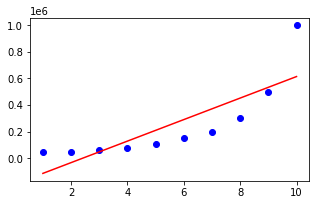

In [23]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,color='blue')
plt.plot(X,model.predict(X),color = 'red')
plt.show()

## Polynomial Regression Model

In [26]:
poly = PolynomialFeatures(degree = 4)
print("Laoded the Polynomial Features")

Laoded the Polynomial Features


In [27]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [30]:
X_poly = poly.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [32]:
poly.fit(X_poly,y)
print("Polynomial Features is Fitted and Trained")

Polynomial Features is Fitted and Trained


In [33]:
model2=LinearRegression()

In [35]:
model2.fit(X_poly,y)
print("The Model is Trained using Polynomial Features ")

The Model is Trained using Polynomial Features 


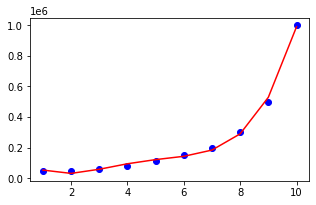

In [36]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,color='blue')
plt.plot(X,model2.predict(X_poly),color = 'red')
plt.show()

In [38]:
round(r2_score(y, model2.predict(X_poly))*100,2)

99.74

In [39]:
mean_squared_error(y, model2.predict(X_poly))

210343822.84382465

In [40]:
mean_absolute_error(y, model2.predict(X_poly))

12681.818181861294

* From the dataset of Position_Salaries, the salary of the employees are being predicted for which the models are prepared like:
1. Linear regression model.
2. Polynomial regression model.

* From the prediction of Linear regression model, the accuracy got around 66.9, Mean Squared Error around 26695878787.878784 and Mean Absolute Error around 128454.54545454546.
* From the prediction of Polynomial regression model the accuracy is around 99.74, Mean Squrared Error is around 210343822.84382465 and Mean Absolute Error around 12681.81818184008.


* From both the prediction models the Polyomial regression model got the higher accuracy of 99.74 than Linear Regression model.
* So, according to the analysis, the polynomial regression is most efficient for the prediction of salary of the employees.
 